# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dian Ayu Setiawati
- **Email:** dasetiawati@gmail.com
- **ID Dicoding:** dianayoe

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue bulanan perusahaan selama 3 tahun terakhir?
- Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?
- Bagaimana perbandingan jumlah pengiriman pesanan tepat waktu dan terlambat?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv('https://raw.githubusercontent.com/dianayustw/E-Commerce-Public-Dataset/master/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Menilai tabel `customers_df`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai tabel `geolocation_df`

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai tabel `orders_items_df`

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [21]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai tabel `order_payments_df`

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai tabel `order_reviews_df`

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai tabel `orders_df`

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai tabel `product_category_df`

In [35]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai tabel `products_df`

In [39]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [41]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [42]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai tabel `sellers_df`

In [43]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [45]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

#### Membersihkan tabel `geolocation_df`

##### Duplicate data

In [47]:
print("Jumlah duplikasi Geolocation: ", geolocation_df.duplicated().sum())

Jumlah duplikasi Geolocation:  261831


In [48]:
geolocation_df.drop_duplicates(inplace=True)

In [49]:
print("Jumlah duplikasi Geolocation: ", customers_df.duplicated().sum())

Jumlah duplikasi Geolocation:  0


#### Membersihkan tabel `order_items_df`

##### Memperbaiki tipe data

In [50]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [51]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [52]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan tabel `order_reviews_df`

##### Missing values

In [53]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [54]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [55]:
order_reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [56]:
order_reviews_df["review_comment_title"].fillna(value="No Comment Title", inplace=True)

In [57]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [58]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment Title,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment Title,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment Title,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Comment Title,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,No Comment Title,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,No Comment Title,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,No Comment Title,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Comment Title,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Comment Title,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [59]:
order_reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [60]:
order_reviews_df["review_comment_message"].fillna(value="No Comment Message", inplace=True)

In [61]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Memperbaiki tipe data

In [62]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [63]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [64]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Membersihkan tabel `orders_df`

In [65]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [66]:
orders_df.dropna(axis=0, inplace=True)

In [67]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### Memperbaiki tipe data

In [68]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [69]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [70]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Membersihkan tabel `products_df`

In [71]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [72]:
products_df.dropna(axis=0, inplace=True)

In [73]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `order_items_df`

In [74]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
68323,9c2b756025a127a4db2a4b13281664f6,1,5d52927f3cf2e3266c5dd6e4d2dd566a,a066df7361163e7ddc5d7452dd17448b,2018-03-01 13:15:33,59.90,15.17
63214,9052568e67f195d6a8c6cd878d3eba7a,1,ec2d43cc59763ec91694573b31f1c29a,1c129092bf23f28a5930387c980c0dfc,2017-10-16 23:35:22,45.90,15.11
69100,9dd2846e2fd754eb21361544d11a1d71,1,1a90af24f474949bdc928a39b627fd57,afa6714acee029b2dfdf357e5579cc03,2017-09-12 17:05:15,74.99,12.86
20635,2f4e3e731a6a92ce3bc2be821babd2f1,1,13b327c2193f552f00ec5b1e442f52b2,9449f25aeaf531019b76999ea49a6949,2017-08-24 13:44:52,89.99,9.00
25789,3aa02c25c6bd28d27a4c961ce20c327a,1,b1de2a0563813db30923566ab847d03a,4cc4fd4fdd406a85bbdc1f824b731bd7,2018-03-02 12:29:07,269.99,15.62


In [75]:
order_items_df.describe(include="all")

C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\3210315173.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_items_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [76]:
order_items_df.order_id.is_unique

False

In [77]:
order_items_df.groupby(by="product_id").order_id.count().sort_values(ascending=False)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
6ca99f05e9c1952a6597264e87f01378      1
6ca54e191592a843087a042b0665d7ef      1
6ca5428af5edb5066b1966ad58501b60      1
6ca32b4631431cb1fe976880797a0f5c      1
fffe9eeff12fcbd74a2f2b007dde0c58      1
Name: order_id, Length: 32951, dtype: int64

In [78]:
order_items_df.groupby(by="price").order_id.nunique().sort_values(ascending=False)

price
59.90      2087
69.90      1821
49.90      1675
89.90      1419
99.90      1319
           ... 
189.42        1
46.63         1
189.49        1
189.59        1
6735.00       1
Name: order_id, Length: 5968, dtype: int64

### Explore `order_payments_df`

In [79]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
23297,c337be7e160adf73d51a64678b8f7ede,1,credit_card,1,58.67
28611,ff978de32e717acd3b5abe1fb069d2b6,3,voucher,1,0.66
11842,29adb190ea6b3fbffaeca57ecb48623d,1,credit_card,1,41.28
97140,44900db49b182f4c5488152220bed716,1,credit_card,5,84.67
60394,b888541e85bd60bfb0c0851ab1146c2a,1,credit_card,10,113.62


In [80]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [81]:
order_payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [82]:
order_payments_df["payment_method"] = order_payments_df["payment_installments"].apply(lambda x: "Full Payment" if x == 1 else "Installment")
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,payment_method
40626,e3229814a5d932778d6a52c6816715f1,1,credit_card,1,22.70,Full Payment
46939,e46fb51d8715ef0a91c9e18e9d6f2470,1,credit_card,1,96.61,Full Payment
11967,cb445995870a57b13fdc0da6c15d5b27,1,credit_card,6,156.18,Installment
25861,32906a7376b5ff689e78c67f25059b4f,1,credit_card,4,42.51,Installment
5091,4689b1816de42507a7d63a4617383c59,7,voucher,1,56.42,Full Payment


In [83]:
order_payments_df.groupby(by="payment_method").agg({
    "order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std", ]
})

order_id payment_value                               
                nunique           max    min        mean         std
payment_method                                                      
Full Payment      49060      13664.08   0.00  112.420229  177.556132
Installment       51172       6929.31  20.03  196.759617  244.652367

### Explore `orders_df`

In [84]:
orders_df.describe(include="all")

C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders_df.describe(include="all")
C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\2273736046.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt th

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


In [85]:
orders_df.order_status.value_counts()

delivered    96455
canceled         6
Name: order_status, dtype: int64

In [86]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


In [87]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   delivery_time                  96461 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 7.4+ MB


In [88]:
filtered_delivery_status_df = orders_df.loc[orders_df['order_delivered_customer_date'] <= orders_df['order_estimated_delivery_date']]

filtered_order_id_set = set(filtered_delivery_status_df['order_id'])

orders_df["delivery_status"] = orders_df["order_id"].apply(lambda x: "On Time" if x in filtered_order_id_set else "Delayed")
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
91030,aae4a80d679f211688ed391ae747100f,d3e959746cfd88a3e1392952b9892c62,delivered,2017-11-12 16:21:38,2017-11-12 16:46:15,2017-11-16 19:47:56,2017-11-20 15:14:49,2017-12-08,8.0,On Time
28809,aa31e416f67318939922854f9af2b087,6fa292be2a8b1beaf488023433d49522,delivered,2018-08-09 20:00:05,2018-08-09 20:10:13,2018-08-10 13:32:00,2018-08-15 17:13:04,2018-08-17,6.0,On Time
37505,9f1c165cccc244ac8d0e3a1f2d3a296b,d59ea05d6a56927cc0d442088170ec50,delivered,2017-05-14 23:14:21,2017-05-16 14:15:09,2017-05-18 14:30:53,2017-05-29 05:04:01,2017-06-14,14.0,On Time
69498,481fc532b3f80d9dea57e91dbbcf7119,26fa92624a59797dda22be2e952140ee,delivered,2018-08-09 11:48:38,2018-08-10 03:15:20,2018-08-10 12:01:00,2018-08-21 02:22:14,2018-09-04,12.0,On Time
45663,1b0c7ed83d9a4480ab15d766b446efd9,648e9b8478021e84252b8930c9d93a64,delivered,2017-12-24 17:42:20,2017-12-24 17:54:36,2017-12-26 14:08:51,2018-01-13 14:43:06,2018-02-01,20.0,On Time


In [89]:
orders_df.delivery_status.value_counts()

On Time    88635
Delayed     7826
Name: delivery_status, dtype: int64

### Explore `order_items_df` & `order_payments_df`


#### Menggabungkan data `order_items_df` & `order_payments_df`

In [90]:
order_items_payments_df = pd.merge(
    left=order_items_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_items_payments_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,payment_method
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,Installment
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,Installment
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,Installment
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,Installment
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,Installment


### Explore `order_items_payments_df` & `orders_df`


#### Menggabungkan data `order_items_payments_df` & `orders_df`

In [91]:
all_orders_df = pd.merge(
    left=order_items_payments_df,
    right=orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,payment_method,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,Installment,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,On Time
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,Installment,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,On Time
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,Installment,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,On Time
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,Installment,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,On Time
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,Installment,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,On Time


In [92]:
all_orders_df.to_csv("all_orders.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue bulanan perusahaan selama 3 tahun terakhir?

In [93]:
all_orders_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,payment_method,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
49015,6a5f6e137c8ecd4e1389645cfee6182b,2,a237de12bdf0bfe4fe220bae65a89731,6c7d50c24b3ccd2fd83b44d8bb34e073,2017-10-13 18:07:25,37.50,13.37,1.0,credit_card,7.0,...,Installment,dd9e4c1eca6003eba8ada3a5b1484563,delivered,2017-10-07 17:56:41,2017-10-07 18:07:25,2017-10-10 17:30:18,2017-10-16 18:42:27,2017-11-01,9.0,On Time
41886,5b0060ee75c02410928f7ca9e4632c5d,2,f99c1a9777ae7b608359a17bf3436d90,cca3071e3e9bb7d12640c9fbe2301306,2017-07-13 12:43:44,29.90,16.11,1.0,credit_card,1.0,...,Full Payment,4f48789f76d0b81afbbc50209b157740,delivered,2017-06-28 22:34:09,2017-06-29 12:43:44,2017-07-06 07:55:37,2017-07-19 16:34:29,2017-07-28,21.0,On Time
1242,02d0cd05f04ab2e3c1acc473b0abc865,1,77fa3381855b6763c52ca3b72824f508,6560211a19b47992c3666cc44a7e94c0,2018-03-29 14:30:49,49.00,37.04,1.0,credit_card,3.0,...,Installment,7a8cd6b234a923bf3984d793b0b64154,delivered,2018-03-25 14:19:18,2018-03-25 14:30:49,2018-03-26 22:42:17,2018-05-16 12:24:28,2018-05-03,52.0,Delayed
116353,fd4a7190606c77ffa23d74c44119d191,1,9e732d38cfd6517373ef04c130323aa6,213b25e6f54661939f11710a6fddb871,2018-05-02 06:31:02,129.95,37.60,1.0,credit_card,3.0,...,Installment,ec0410d8b538eeac93d523a1d9c16955,delivered,2018-04-25 06:15:16,2018-04-25 07:00:53,2018-05-03 15:12:00,2018-05-17 19:43:47,2018-05-29,23.0,On Time
71646,9c9a4274d58a43917a770c9f158c5002,1,2ce9227f31dd89541bd4b89d835e9056,26785a546900236d66f2e4197c211158,2017-12-29 21:32:15,140.00,8.24,1.0,credit_card,3.0,...,Installment,6d9df9db5e31093ce82edb4850bc1029,delivered,2017-12-23 20:12:24,2017-12-23 21:32:15,2017-12-27 14:22:56,2017-12-28 22:48:05,2018-01-15,5.0,On Time


In [94]:
monthly_orders_16_df = all_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

monthly_orders_16_df = monthly_orders_16_df[monthly_orders_16_df['order_purchase_timestamp'].apply(lambda x: str(x.year).startswith('2016'))]
monthly_orders_16_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_16_df['order_purchase_timestamp']).dt.strftime('%B')
monthly_orders_16_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

print("Number of Orders per Month (2016)")
monthly_orders_16_df

Number of Orders per Month (2016)


,order_date,order_count,revenue
0,September,1,0.00
1,October,270,62591.65
2,November,0,0.00
3,December,1,19.62


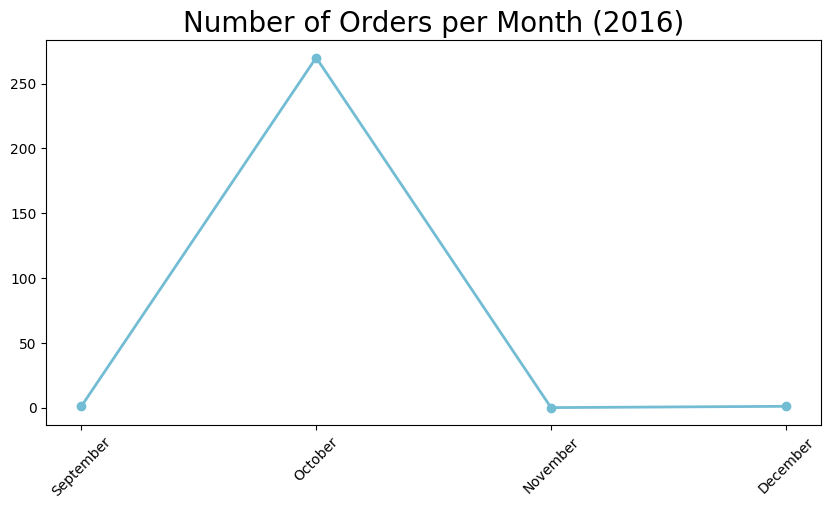

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_16_df["order_date"],
    monthly_orders_16_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2016)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [96]:
monthly_orders_17_df = all_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

monthly_orders_17_df = monthly_orders_17_df[monthly_orders_17_df['order_purchase_timestamp'].apply(lambda x: str(x.year).startswith('2017'))]
monthly_orders_17_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_17_df['order_purchase_timestamp']).dt.strftime('%B')
monthly_orders_17_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

print("Number of Orders per Month (2017)")
monthly_orders_17_df

Number of Orders per Month (2017)


,order_date,order_count,revenue
4,January,748,176376.56
5,February,1641,323815.95
6,March,2546,505735.83
7,April,2303,456108.32
8,May,3545,701119.60
9,June,3135,585400.98
10,July,3872,716069.98
11,August,4193,842689.94
12,September,4149,996085.61
13,October,4478,998609.62


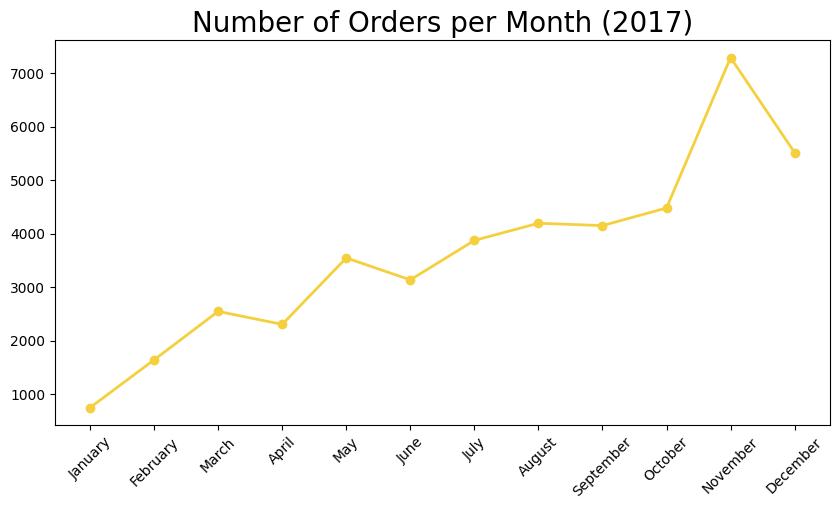

In [97]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_17_df["order_date"],
    monthly_orders_17_df["order_count"],
    marker='o',
    linewidth=2,
    color="#F4D03F"
)
plt.title("Number of Orders per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [98]:
monthly_orders_18_df = all_orders_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).reset_index()

monthly_orders_18_df = monthly_orders_18_df[monthly_orders_18_df['order_purchase_timestamp'].apply(lambda x: str(x.year).startswith('2018'))]
monthly_orders_18_df['order_purchase_timestamp'] = pd.to_datetime(monthly_orders_18_df['order_purchase_timestamp']).dt.strftime('%B')
monthly_orders_18_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

print("Number of Orders per Month (2018)")
monthly_orders_18_df

Number of Orders per Month (2018)


,order_date,order_count,revenue
16,January,7069,1374064.02
17,February,6556,1280014.54
18,March,7003,1435458.33
19,April,6798,1466607.15
20,May,6749,1480667.59
21,June,6096,1285396.78
22,July,6156,1306707.42
23,August,6351,1211240.09


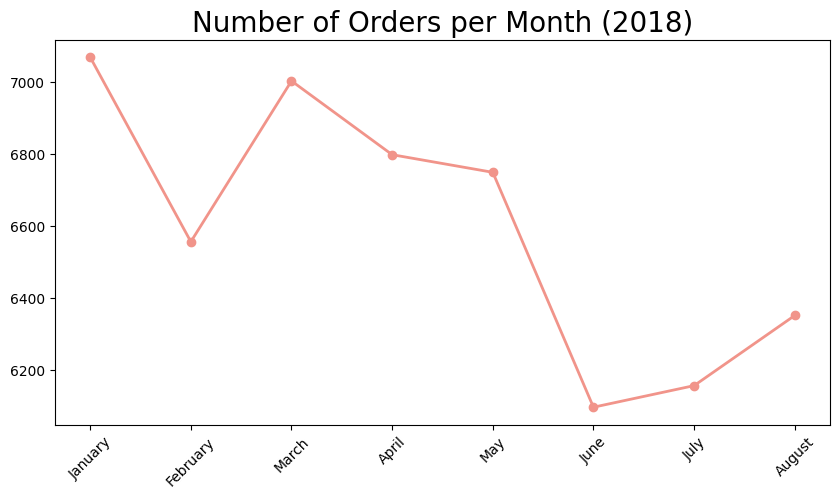

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_18_df["order_date"],
    monthly_orders_18_df["order_count"],
    marker='o',
    linewidth=2,
    color="#F1948A"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

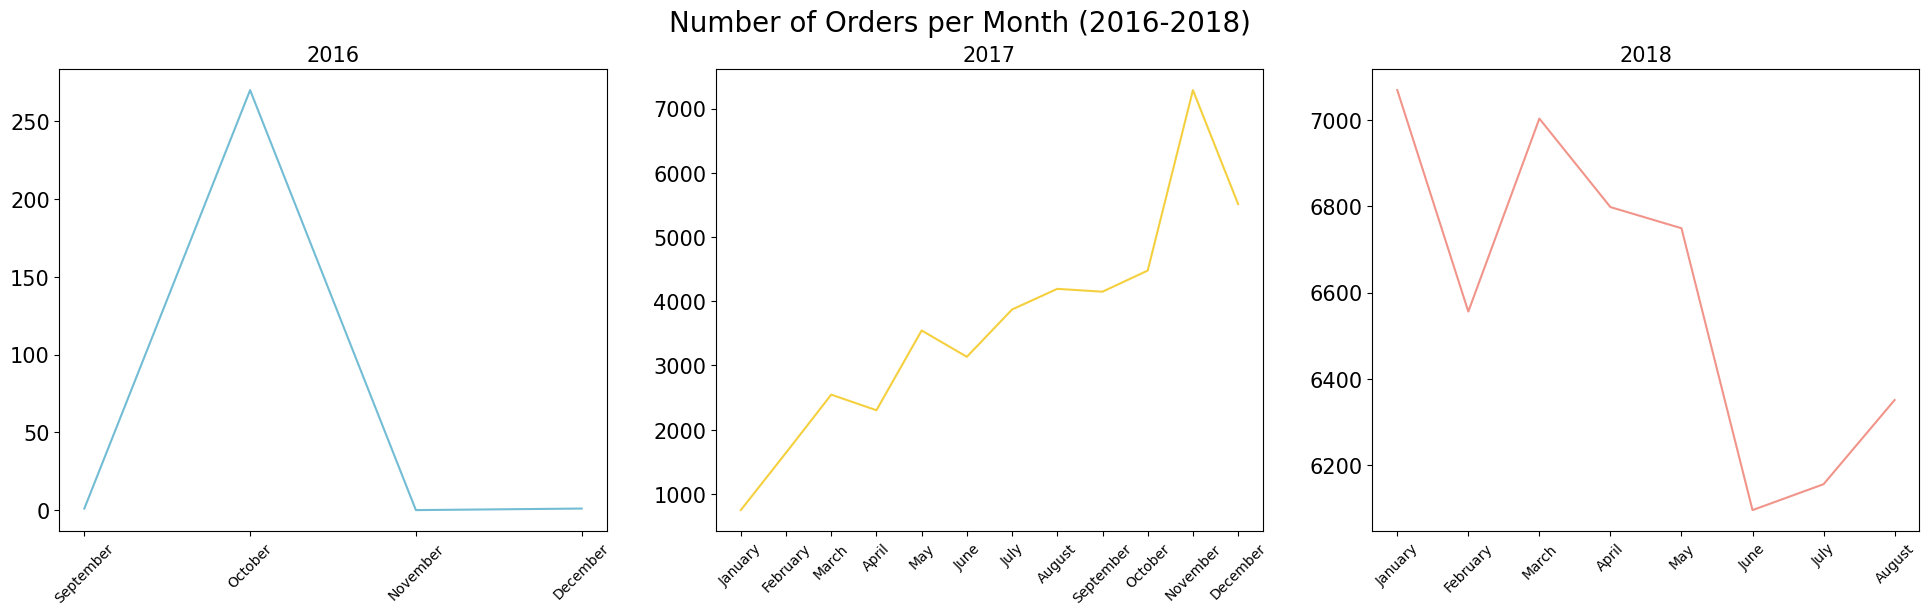

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#72BCD4", "#F4D03F", "#F1948A"]

sns.lineplot(x="order_date", y="order_count", data=monthly_orders_16_df, color=colors[0], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("2016", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="order_count", data=monthly_orders_17_df, color=colors[1], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("2017", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=15)
ax[1].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="order_count", data=monthly_orders_18_df, color=colors[2], ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("2018", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].tick_params(axis ='x', rotation=45)

plt.suptitle("Number of Orders per Month (2016-2018)", fontsize=20)
plt.show()

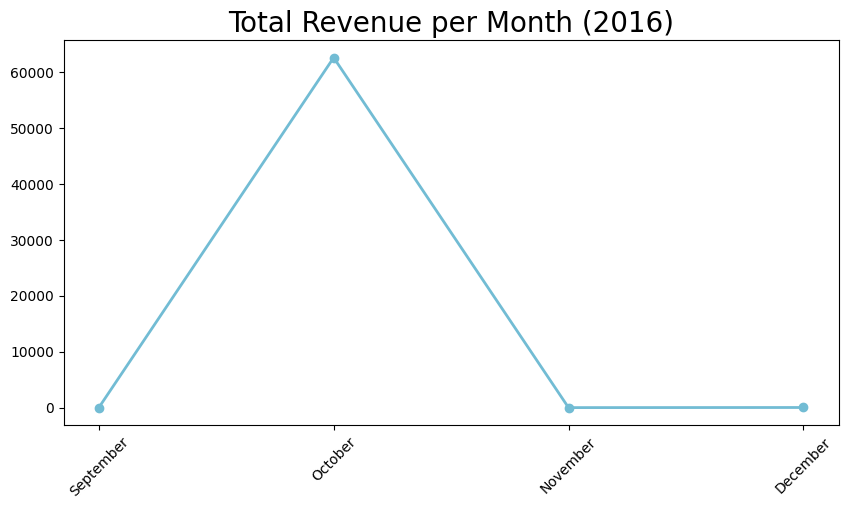

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_16_df["order_date"],
    monthly_orders_16_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2016)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

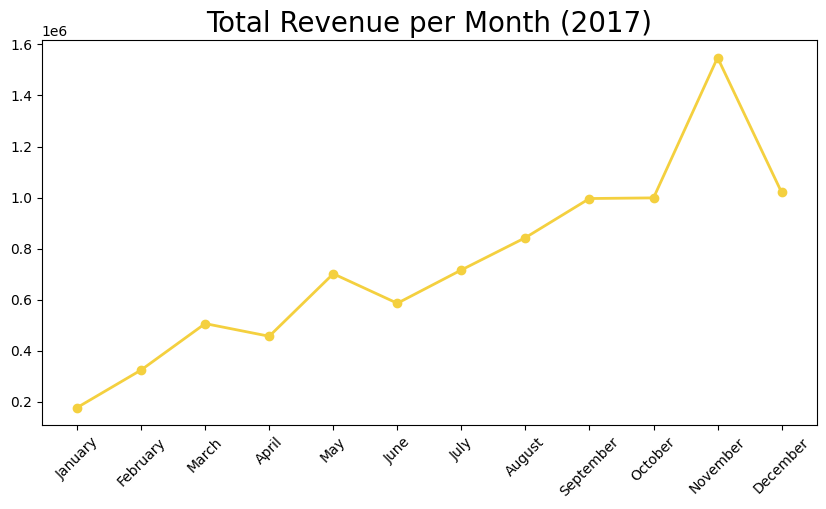

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_17_df["order_date"],
    monthly_orders_17_df["revenue"],
    marker='o',
    linewidth=2,
    color="#F4D03F"
)
plt.title("Total Revenue per Month (2017)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

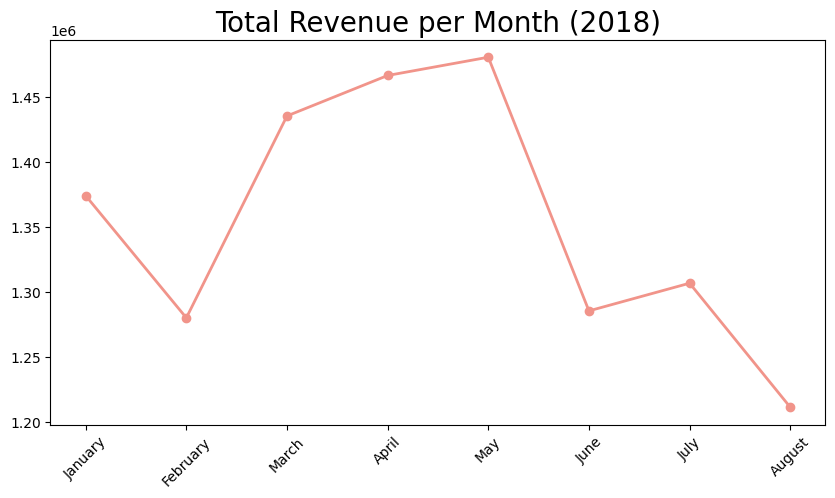

In [103]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_18_df["order_date"],
    monthly_orders_18_df["revenue"],
    marker='o',
    linewidth=2,
    color="#F1948A"
)
plt.title("Total Revenue per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

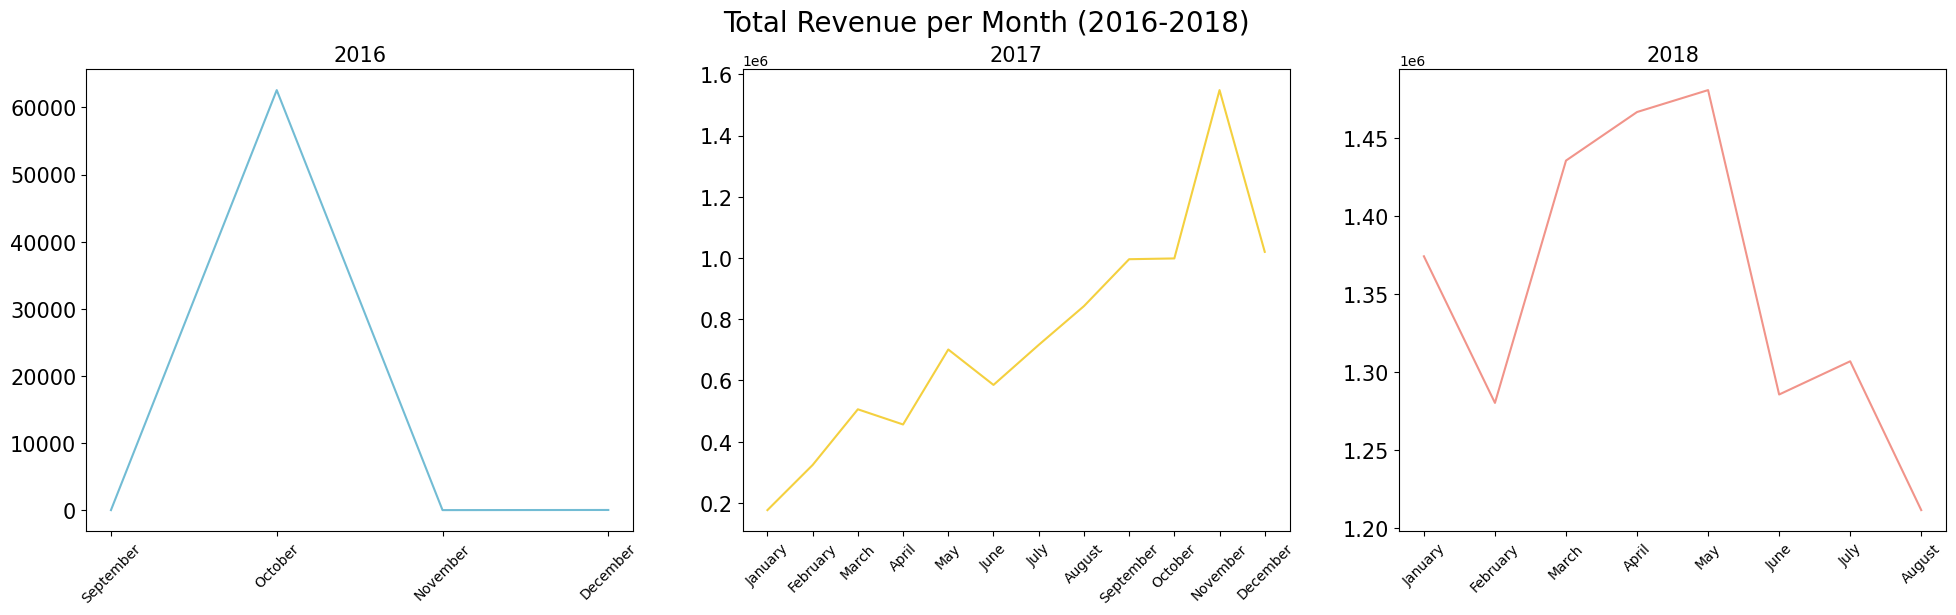

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

colors = ["#72BCD4", "#F4D03F", "#F1948A"]

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_16_df, color=colors[0], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("2016", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=15)
ax[0].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_17_df, color=colors[1], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("2017", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=15)
ax[1].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_18_df, color=colors[2], ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("2018", loc="center", fontsize=15)
ax[2].tick_params(axis ='y', labelsize=15)
ax[2].tick_params(axis ='x', rotation=45)

plt.suptitle("Total Revenue per Month (2016-2018)", fontsize=20)
plt.show()

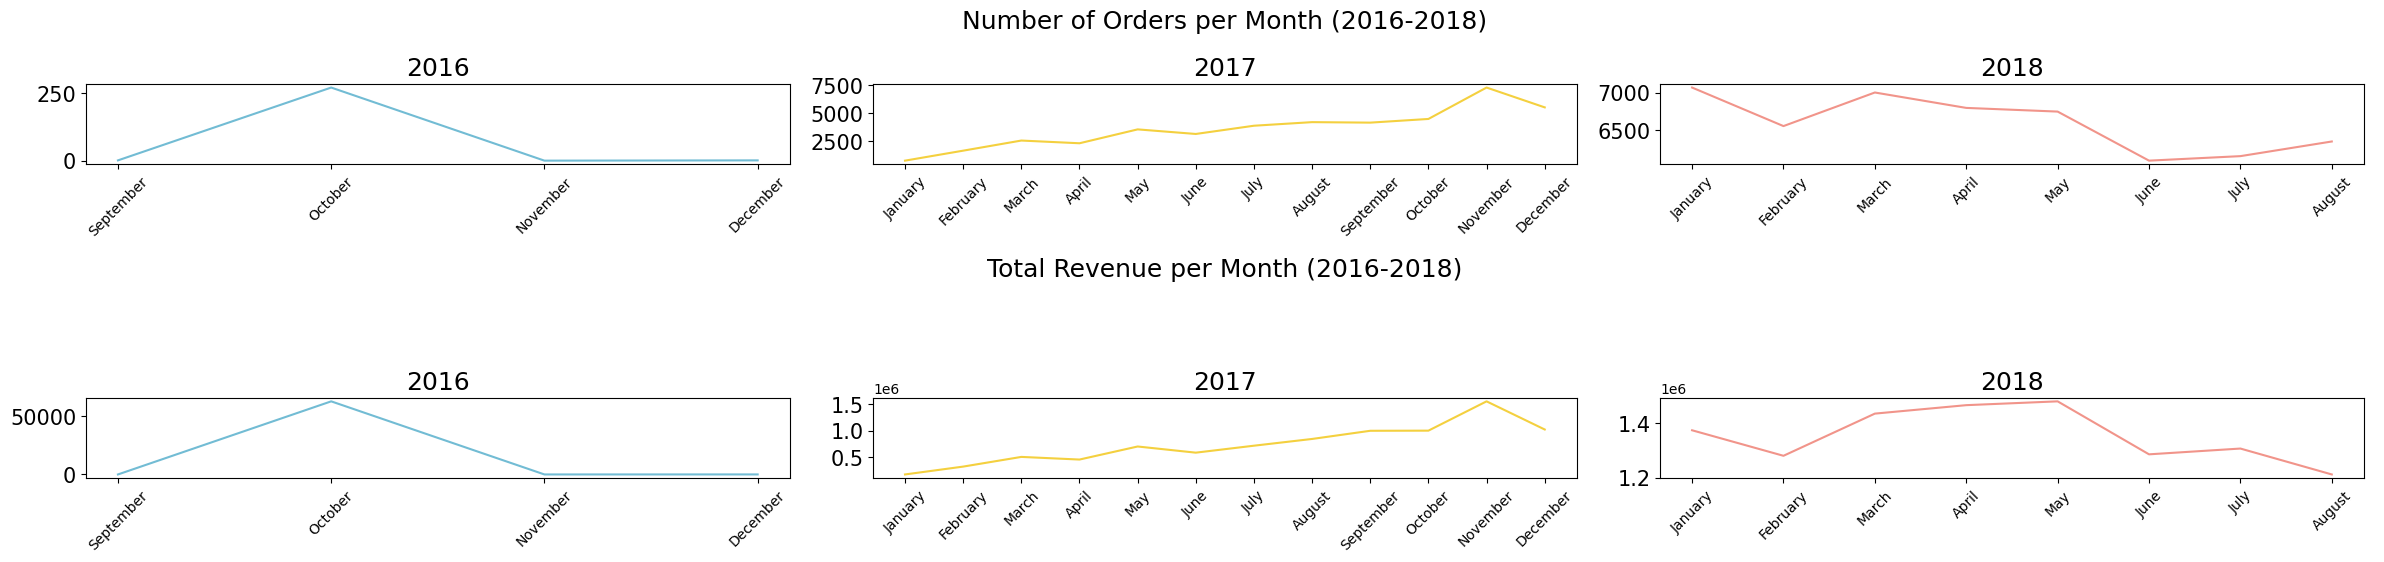

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(24, 6))

colors = ["#72BCD4", "#F4D03F", "#F1948A"]

fig.add_subplot(211, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Total Revenue per Month (2016-2018)", labelpad=50, fontsize=18)
plt.title("Number of Orders per Month (2016-2018)", pad=40, fontsize=18)
sns.lineplot(x="order_date", y="order_count", data=monthly_orders_16_df, color=colors[0], ax=ax[0, 0])

ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title("2016", loc="center", fontsize=18)
ax[0, 0].tick_params(axis ='y', labelsize=15)
ax[0, 0].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="order_count", data=monthly_orders_17_df, color=colors[1], ax=ax[0, 1])
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].set_title("2017", loc="center", fontsize=18)
ax[0, 1].tick_params(axis ='y', labelsize=15)
ax[0, 1].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="order_count", data=monthly_orders_18_df, color=colors[2], ax=ax[0, 2])
ax[0, 2].set_ylabel(None)
ax[0, 2].set_xlabel(None)
ax[0, 2].set_title("2018", loc="center", fontsize=18)
ax[0, 2].tick_params(axis ='y', labelsize=15)
ax[0, 2].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_16_df, color=colors[0], ax=ax[1, 0])
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title("2016", loc="center", fontsize=18)
ax[1, 0].tick_params(axis ='y', labelsize=15)
ax[1, 0].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_17_df, color=colors[1], ax=ax[1, 1])
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].set_title("2017", loc="center", fontsize=18)
ax[1, 1].tick_params(axis ='y', labelsize=15)
ax[1, 1].tick_params(axis ='x', rotation=45)

sns.lineplot(x="order_date", y="revenue", data=monthly_orders_18_df, color=colors[2], ax=ax[1, 2])
ax[1, 2].set_ylabel(None)
ax[1, 2].set_xlabel(None)
ax[1, 2].set_title("2018", loc="center", fontsize=18)
ax[1, 2].tick_params(axis ='y', labelsize=15)
ax[1, 2].tick_params(axis ='x', rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?

In [106]:
payment_type_df = all_orders_df.groupby(by="payment_type").order_id.nunique().reset_index()
payment_type_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
payment_type_df

,payment_type,order_count
0,boleto,19614
1,credit_card,75991
2,debit_card,1521
3,voucher,3766


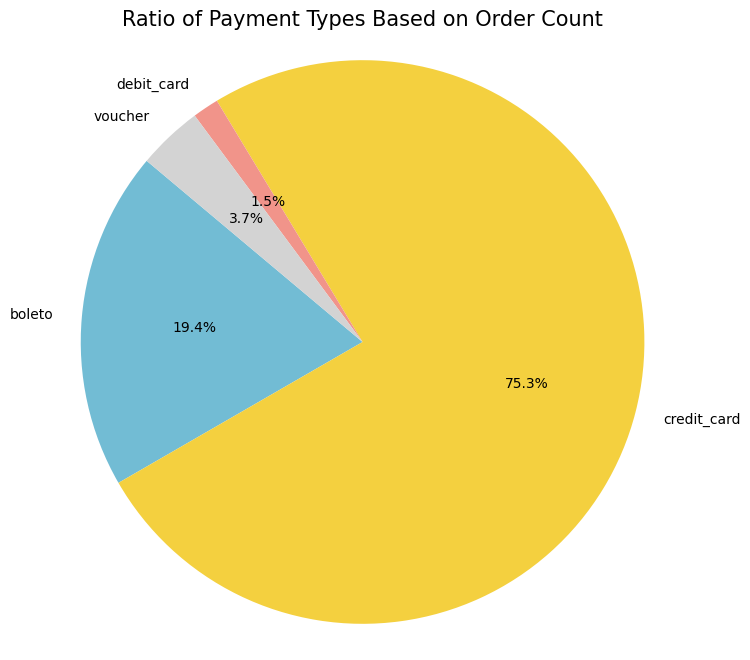

In [107]:
payment_type_df['payment_type'] = pd.Categorical(payment_type_df['payment_type'], ["boleto", "credit_card", "debit_card", "voucher"])
sizes = payment_type_df['order_count']
labels = payment_type_df['payment_type']
colors = ['#72BCD4', '#F4D03F', '#F1948A', '#D3D3D3']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Payment Types Based on Order Count', fontsize=15)
plt.axis('equal')
plt.show()


### Pertanyaan 3: Bagaimana perbandingan jumlah pengiriman pesanan tepat waktu dan terlambat?

In [108]:
all_orders_df.groupby(by="delivery_status").agg({
    "order_id": "nunique",
    "delivery_time": ["max", "min", "mean", "std", ]
})

order_id delivery_time                           
                 nunique           max  min       mean        std
delivery_status                                                  
Delayed             7826         210.0  2.0  31.388101  17.302956
On Time            88635          70.0  1.0  10.831275   6.199649

In [109]:
delivery_status_df = all_orders_df.groupby(by="delivery_status").order_id.nunique().reset_index()
delivery_status_df.rename(columns={
    "order_id": "order_count"
}, inplace=True)
delivery_status_df

,delivery_status,order_count
0,Delayed,7826
1,On Time,88635


C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\763530065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


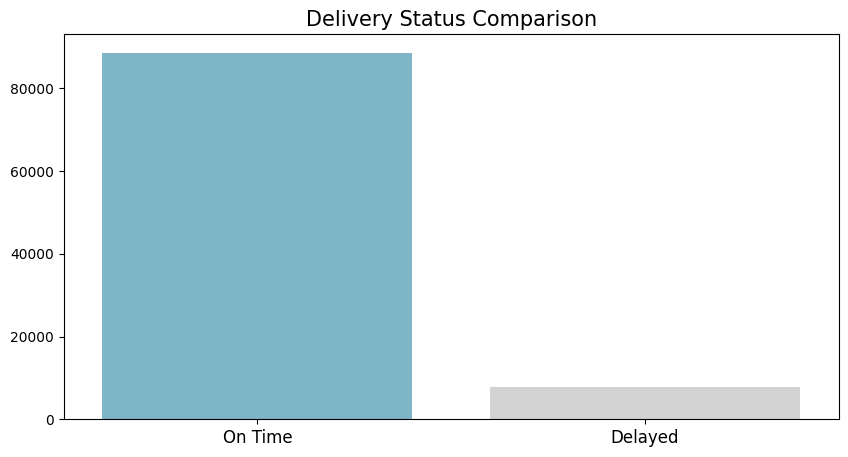

In [110]:
delivery_status_df['delivery_status'] = pd.Categorical(delivery_status_df['delivery_status'], ["On Time", "Delayed"])
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4","#D3D3D3"]

sns.barplot(
    y="order_count",
    x="delivery_status",
    data=delivery_status_df.sort_values(by="delivery_status", ascending=False),
    palette=colors_
)
plt.title("Delivery Status Comparison", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [111]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   order_item_id                  117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   seller_id                      117604 non-null  object        
 4   shipping_limit_date            117604 non-null  datetime64[ns]
 5   price                          117604 non-null  float64       
 6   freight_value                  117604 non-null  float64       
 7   payment_sequential             117601 non-null  float64       
 8   payment_type                   117601 non-null  object        
 9   payment_installments           117601 non-null  float64       
 10  payment_value                  117601 non-null  float64       
 11  

## Conclusion

- `Pertanyaan 1:`
Berdasarkan analisis data, terdapat perbedaan pola performa penjualan bulanan dan total revenue perusahaan selama 3 tahun terakhir. Pada tahun 2016, terjadi kenaikan dan penurunan yang signifikan dari September hingga November, kemudian tinggal di angka minimal hingga Desember. Pada tahun 2017, terjadi kenaikan yang stabil sepanjang tahun dengan puncaknya di bulan November. Sedangkan pada tahun 2018, terjadi kenaikan dan penurunan setiap bulannya, tetapi dengan pola yang berkebalikan antara total penjualan dan revenue pada rentang bulan Maret hingga Mei serta Juli hingga Agustus, menunjukkan ketidakseimbangan antara total penjualan dan revenue.

- `Pertanyaan 2:`
Berdasarkan hasil analisis data, dapat disimpulkan bahwa metode pembayaran yang paling umum digunakan saat melakukan pemesanan adalah "credit_card," dengan total penggunaan mencapai 75,3%. Metode pembayaran lainnya yang juga digunakan adalah "boleto" dan "voucher," sedangkan yang paling jarang digunakan adalah "debit_card."

- `Pertanyaan 3:`
Berdasarkan hasil analisis data, dapat disimpulkan bahwa pesanan yang dikirim tepat waktu mendominasi dibandingkan dengan pesanan yang terlambat. Hal ini dihitung berdasarkan selisih tanggal estimasi penerimaan dan tanggal sebenarnya pesanan sampai. Total pesanan yang dikirim terlambat hanya sekitar 8,12% dari keseluruhan total pesanan yang mengindikasikan cukup baiknya layanan pengiriman.

## RFM Analysis

In [112]:
all_orders_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,payment_method,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
42787,5d0b508f52e300518b26bdf4807a29a6,1,1b8ee158f59c098470fad33f39660964,1554a68530182680ad5c8b042c3ab563,2017-10-10 16:46:00,139.90,72.83,1.0,credit_card,3.0,...,Installment,1a9539bf502eca6d99aecfd13c7cc0a4,delivered,2017-10-04 16:29:11,2017-10-04 16:46:00,2017-10-06 10:45:34,2017-10-27 18:33:35,2017-11-17,23.0,On Time
94270,cd1c59db504eaebe7f53d4cb13b5dc1a,1,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,2017-11-27 15:46:55,49.00,16.79,1.0,credit_card,2.0,...,Installment,2a61e5125d7e9eea66d796d3a24e49d8,delivered,2017-11-21 15:33:48,2017-11-21 15:46:55,2017-11-22 16:46:34,2017-12-19 00:58:48,2017-12-18,27.0,Delayed
61472,85ead861d8aad2f8734d85d187a42b7f,1,1e5428c428e0f783acd6e3d94ba4ee2a,53243585a1d6dc2643021fd1853d8905,2017-12-15 18:15:25,599.00,55.41,1.0,boleto,1.0,...,Full Payment,7c7165957bda66e88708766f34c334f3,delivered,2017-12-07 09:08:59,2017-12-11 18:15:25,2017-12-13 22:24:37,2017-12-19 21:42:40,2018-01-03,13.0,On Time
117347,ff632bc583a94f23c59db4cbaa0ba2ab,1,0a4f9f421af66d2ea061fbb8883419f7,c70c1b0d8ca86052f45a432a38b73958,2018-05-13 22:53:41,110.32,7.96,1.0,credit_card,1.0,...,Full Payment,0214d81e1cb90cf47f40f5345a1a6c08,delivered,2018-05-09 22:23:41,2018-05-09 22:53:41,2018-05-10 19:05:00,2018-05-21 19:03:44,2018-05-17,12.0,Delayed
87844,bf2c047d037b7ff9d4a0032cf32c06c7,1,ecf9484703bdfb9cfcc1ac9c2084b567,59b22a78efb79a4797979612b885db36,2018-04-27 20:31:28,265.00,54.05,1.0,credit_card,6.0,...,Installment,2768315d55fffb8dfdc1f2b8acd14854,delivered,2018-04-22 20:17:49,2018-04-24 19:10:33,2018-04-24 22:06:39,2018-04-27 15:22:31,2018-05-17,5.0,On Time


In [113]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117604 entries, 0 to 117603
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   order_item_id                  117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   seller_id                      117604 non-null  object        
 4   shipping_limit_date            117604 non-null  datetime64[ns]
 5   price                          117604 non-null  float64       
 6   freight_value                  117604 non-null  float64       
 7   payment_sequential             117601 non-null  float64       
 8   payment_type                   117601 non-null  object        
 9   payment_installments           117601 non-null  float64       
 10  payment_value                  117601 non-null  float64       
 11  

In [114]:
rfm_df = all_orders_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01


In [115]:
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,288
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,107.01,149


In [116]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


In [117]:
rfm_df.describe()

,frequency,monetary,recency
count,96461.0,96461.000000,96461.000000
mean,1.0,204.988490,239.640953
std,0.0,621.289938,152.830809
min,1.0,0.000000,0.000000
25%,1.0,62.650000,116.000000
50%,1.0,109.500000,221.000000
75%,1.0,195.540000,349.000000
max,1.0,109312.640000,713.000000


In [118]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
86865,e60df9449653a95af4549bbfcb18a6eb,1,1021.92,0
25778,448945bc713d98b6726e82eda6249b9e,1,2486.25,0
6218,10a79ef2783cae3d8d678e85fde235ac,1,14.29,0
86192,e450a297a7bc6839ceb0cf1a2377fa02,1,73.10,0
27628,496630b6740bcca28fce9ba50d8a26ef,1,33.23,0


In [119]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
64304,aa5e0a0c36015d39de864189a2b00b09,1,99.33,15
64313,aa6190994371836fc1d4596edd827abd,1,250.40,244
64312,aa606152f23a5fa9ba3d0b87f7a492e8,1,72.67,225
64311,aa601b3c45980c0918042d5ca7a25054,1,58.28,167


C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\4286489001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\4286489001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\4286489001.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `lege

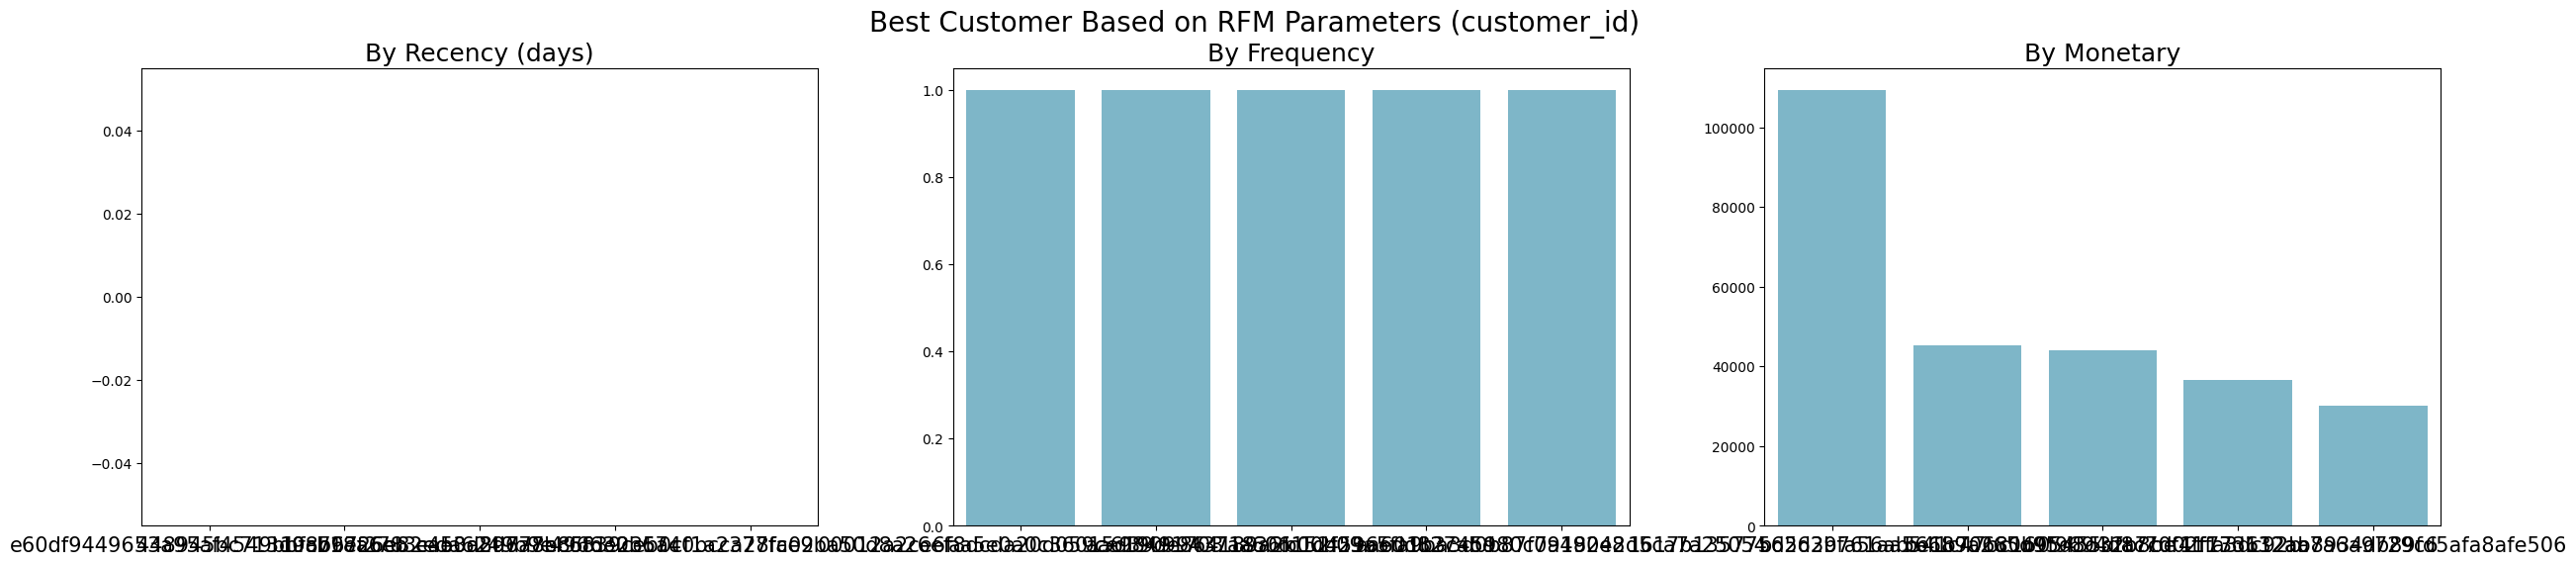

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

#### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [121]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288,32945.5,48231.0,50236.0
1,000161a058600d5901f007fab4c27140,1,67.41,409,16036.0,48231.0,27407.0
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2635.0,48231.0,72324.5
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378,20206.5,48231.0,69401.0
4,000379cdec625522490c315e70c7a9fb,1,107.01,149,64649.5,48231.0,47248.5


In [122]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288,34.155988,100.0,52.079079
1,000161a058600d5901f007fab4c27140,1,67.41,409,16.625197,100.0,28.412519
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,2.731816,100.0,74.977970
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378,20.948930,100.0,71.947212
4,000379cdec625522490c315e70c7a9fb,1,107.01,149,67.024861,100.0,48.981972


In [123]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.14
1,000161a058600d5901f007fab4c27140,2.33
2,0001fd6190edaaf884bcaf3d49edf079,3.56
3,0002414f95344307404f0ace7a26f1d5,3.61
4,000379cdec625522490c315e70c7a9fb,3.30
5,0004164d20a9e969af783496f3408652,2.34
6,000419c5494106c306a97b5635748086,2.32


#### Segmentasi customer berdasarkan RFM_score

In [124]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.14,Medium value customer
1,000161a058600d5901f007fab4c27140,2.33,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.56,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.61,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.30,Medium value customer
5,0004164d20a9e969af783496f3408652,2.34,Low value customers
6,000419c5494106c306a97b5635748086,2.32,Low value customers
7,00046a560d407e99b969756e0b10f282,3.69,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.69,Low value customers
9,000598caf2ef4117407665ac33275130,4.93,Top customers


In [125]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,15617
1,Low value customers,40630
2,Medium value customer,33673
3,Top customers,5497
4,lost customers,1044


In [126]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

C:\Users\DIAN AYU\AppData\Local\Temp\ipykernel_10324\1719527033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


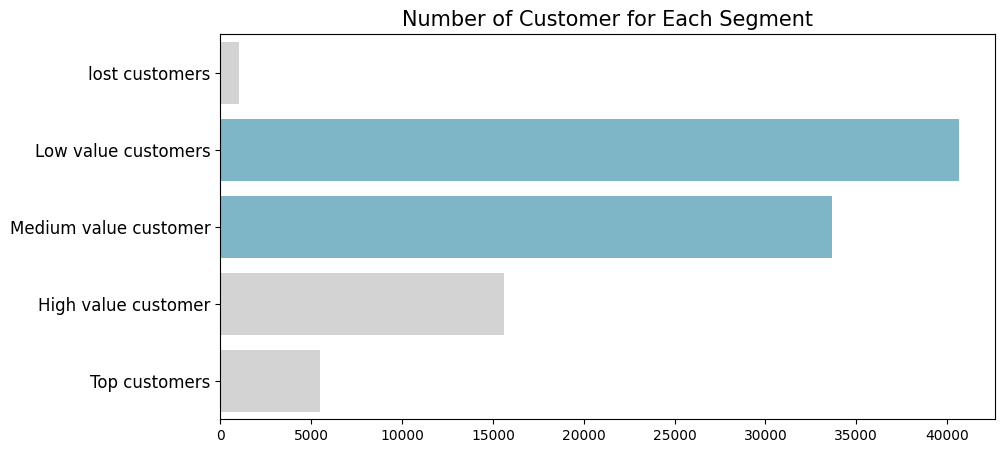

In [127]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()